In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
dsInfo = pd.read_csv('C:\\Users\\Usuario\\Documents\\Maestria\\ModelosApprendizaje\\ProyectosFinales\\CancerSeno\\wdbc.data')

In [3]:
#se agrega cabeceras en las columnas
dsInfo.columns = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']

In [4]:
dsInfo

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
dsInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  568 non-null    int64  
 1   Diagnosis           568 non-null    object 
 2   radius1             568 non-null    float64
 3   texture1            568 non-null    float64
 4   perimeter1          568 non-null    float64
 5   area1               568 non-null    float64
 6   smoothness1         568 non-null    float64
 7   compactness1        568 non-null    float64
 8   concavity1          568 non-null    float64
 9   concave_points1     568 non-null    float64
 10  symmetry1           568 non-null    float64
 11  fractal_dimension1  568 non-null    float64
 12  radius2             568 non-null    float64
 13  texture2            568 non-null    float64
 14  perimeter2          568 non-null    float64
 15  area2               568 non-null    float64
 16  smoothne

In [6]:
#se valida valores nulos
nulos = dsInfo.isnull()
nulos.sum().sum()

0

In [7]:
#Borramos la columna de identificacion 
dsInfo = dsInfo.drop('ID', axis=1)

In [8]:
#creamos vectores x,y
X = dsInfo.drop('Diagnosis', axis=1)
y = dsInfo['Diagnosis']

In [9]:
# Se separa los datos en test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
248,11.520,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.18040,0.09608,0.2664,0.07809
88,14.640,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346,...,16.34,18.24,109.40,803.6,0.1277,0.3089,0.26040,0.13970,0.3151,0.08473
334,17.060,21.00,111.80,918.6,0.11190,0.10560,0.15080,0.09934,0.1727,0.06071,...,20.99,33.15,143.20,1362.0,0.1449,0.2053,0.39200,0.18270,0.2623,0.07599
362,16.500,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,18.13,25.45,117.20,1009.0,0.1338,0.1679,0.16630,0.09123,0.2394,0.06469
33,16.130,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.07752,0.1998,0.06515,...,20.21,27.26,132.70,1261.0,0.1446,0.5804,0.52740,0.18640,0.4270,0.12330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,17.200,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.07944,0.1927,0.06487,...,23.32,33.82,151.60,1681.0,0.1585,0.7394,0.65660,0.18990,0.3313,0.13390
106,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,...,13.29,27.49,85.56,544.1,0.1184,0.1963,0.19370,0.08442,0.2983,0.07185
270,11.290,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270,...,12.32,16.18,78.27,457.5,0.1358,0.1507,0.12750,0.08750,0.2733,0.08022
435,12.870,19.54,82.67,509.2,0.09136,0.07883,0.01797,0.02090,0.1861,0.06347,...,14.45,24.38,95.14,626.9,0.1214,0.1652,0.07127,0.06384,0.3313,0.07735


In [11]:
X_test

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
218,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.06637,0.1428,0.05313,...,27.90,45.41,180.20,2477.0,0.14080,0.4097,0.3995,0.16250,0.2713,0.07568
79,11.45,20.97,73.81,401.5,0.11020,0.09362,0.04591,0.02233,0.1842,0.07005,...,13.11,32.16,84.53,525.1,0.15570,0.1676,0.1755,0.06127,0.2762,0.08851
104,13.11,15.56,87.21,530.2,0.13980,0.17650,0.20710,0.09601,0.1925,0.07692,...,16.31,22.40,106.40,827.2,0.18620,0.4099,0.6376,0.19860,0.3147,0.14050
208,15.27,12.91,98.17,725.5,0.08182,0.06230,0.05892,0.03157,0.1359,0.05526,...,17.38,15.92,113.70,932.7,0.12220,0.2186,0.2962,0.10350,0.2320,0.07474
543,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,0.1620,0.06688,...,15.05,24.75,99.17,688.6,0.12640,0.2037,0.1377,0.06845,0.2249,0.08492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
247,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.1398,0.1125,0.06136,0.3409,0.08147
15,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.14640,0.1871,0.2914,0.16090,0.3029,0.08216
557,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,15.48,27.27,105.90,733.5,0.10260,0.3171,0.3662,0.11050,0.2258,0.08004


In [12]:
###############################################################
#Modelo RandomForestClassifier
###############################################################
#Crea el modelo Random Forest
modeloRFC = RandomForestClassifier(n_estimators=100, random_state=42)

In [13]:
#Se entrena el modelo
modeloRFC.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
#Se hace las predicciones en test
y_pred = modeloRFC.predict(X_test)

In [15]:
#Informe de clasificación y matriz de confusión Test
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        68
           M       1.00      0.93      0.97        46

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



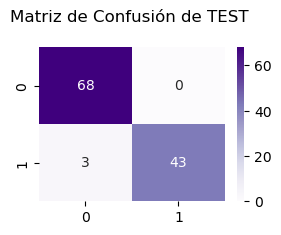

In [16]:
# Dibujar la matriz de confusión Test
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples', xticklabels=range(2), yticklabels=range(2))
plt.title('Matriz de Confusión de TEST \n')
plt.show()

In [17]:
#Se hace las predicciones en train y se genera la matriz de confusión e informe de clasificación
y_pred_train = modeloRFC.predict(X_train)
#Informe de clasificación y matriz de confusión
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
#print(confusion_matrix(y_train, y_pred_train))

Accuracy: 1.0
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       289
           M       1.00      1.00      1.00       165

    accuracy                           1.00       454
   macro avg       1.00      1.00      1.00       454
weighted avg       1.00      1.00      1.00       454



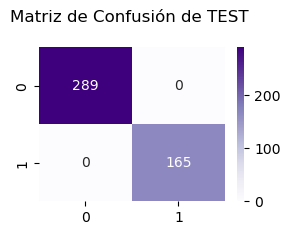

In [18]:
# Dibujar la matriz de confusión Train
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='d', cmap='Purples', xticklabels=range(2), yticklabels=range(2))
plt.title('Matriz de Confusión de TEST \n')
plt.show()

In [19]:
###########################################################################################
#Crea otro modelo Random Forest variando parametros con el fin de ver distintos resultados
###########################################################################################
modeloRFC2 = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=7,min_samples_split=6, class_weight='balanced')

#Se entrena el modelo
modeloRFC2.fit(X_train, y_train)

#Se hace las predicciones en test
y_pred2 = modeloRFC2.predict(X_test)

#Informe de clasificación y matriz de confusión
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
#print(confusion_matrix(y_test, y_pred2))

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           B       0.94      1.00      0.97        68
           M       1.00      0.91      0.95        46

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



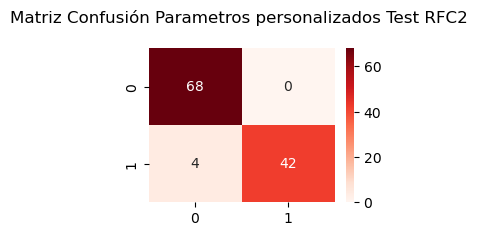

In [20]:
# Dibujar la matriz de confusión Test modelo RFC2
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d', cmap='Reds', xticklabels=range(2), yticklabels=range(2))
plt.title('Matriz Confusión Parametros personalizados Test RFC2 \n')
plt.show()

In [21]:
#Se hace las predicciones en train
y_pred2_train = modeloRFC2.predict(X_train)

In [22]:
#Predice para el segundo modelo RandomForest para train
y_pred2_train = modeloRFC2.predict(X_train)
#Informe de clasificación y matriz de confusión
print("Accuracy:", accuracy_score(y_train, y_pred2_train))
print(classification_report(y_train, y_pred2_train))
#print(confusion_matrix(y_train, y_pred2_train))

Accuracy: 0.9977973568281938
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       289
           M       1.00      0.99      1.00       165

    accuracy                           1.00       454
   macro avg       1.00      1.00      1.00       454
weighted avg       1.00      1.00      1.00       454



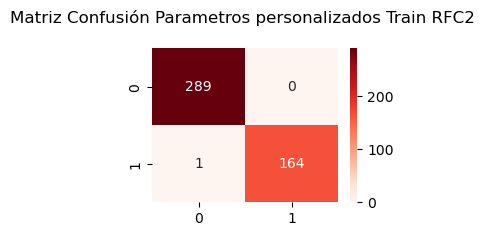

In [23]:
# Dibujar la matriz de confusión Train Modelo RFC2
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_train, y_pred2_train), annot=True, fmt='d', cmap='Reds', xticklabels=range(2), yticklabels=range(2))
plt.title('Matriz Confusión Parametros personalizados Train RFC2 \n')
plt.show()

In [24]:
##################################################################
#Modelo SVM (Support Vector Machine) 
##################################################################
#estandarizamos los datos
scaler = StandardScaler()
X_train_svm = scaler.fit_transform(X_train)
X_test_svm = scaler.transform(X_test)

In [25]:
X_train_svm

array([[-0.73316907, -1.02361042, -0.73799935, ..., -0.25761464,
        -0.38719873, -0.30523587],
       [ 0.14937775, -0.94846571,  0.16257668, ...,  0.40762874,
         0.44940541,  0.06920992],
       [ 0.83391728,  0.44777149,  0.82176544, ...,  1.06341658,
        -0.45763153, -0.42365999],
       ...,
       [-0.79822861, -1.48175075, -0.80543975, ..., -0.38846719,
        -0.2686655 , -0.18511998],
       [-0.35129785,  0.09386415, -0.37612405, ..., -0.74930301,
         0.72770084, -0.34696628],
       [-1.19820336,  0.05992783, -1.14593151, ..., -0.2361109 ,
        -0.4593494 ,  0.07879663]])

In [26]:
#se crea el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)

In [27]:
#Se entrena el modelo
svm_model.fit(X_train_svm, y_train)

SVC(kernel='linear', random_state=42)

In [28]:
# Realiza predicciones en Test
y_pred_svm = svm_model.predict(X_test_svm)

In [29]:
# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
#print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        68
           M       0.98      0.93      0.96        46

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



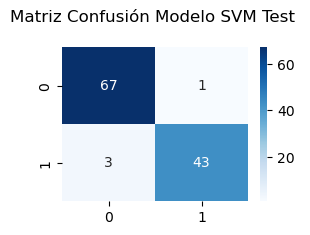

In [30]:
# Dibujar la matriz de confusión modelo SVM Test
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', xticklabels=range(2), yticklabels=range(2))
plt.title('Matriz Confusión Modelo SVM Test \n')
plt.show()

In [31]:
# Realizar predicciones en train
y_pred_svm_train = svm_model.predict(X_train_svm)

In [32]:
# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_train, y_pred_svm_train))
print(classification_report(y_train, y_pred_svm_train))
#print(confusion_matrix(y_train, y_pred_svm_train))

Accuracy: 0.9889867841409692
              precision    recall  f1-score   support

           B       0.99      1.00      0.99       289
           M       0.99      0.98      0.98       165

    accuracy                           0.99       454
   macro avg       0.99      0.99      0.99       454
weighted avg       0.99      0.99      0.99       454



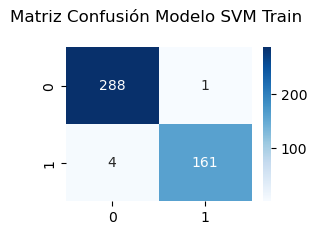

In [33]:
# Dibujar la matriz de confusión modelo SVM Train
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_train, y_pred_svm_train), annot=True, fmt='d', cmap='Blues', xticklabels=range(2), yticklabels=range(2))
plt.title('Matriz Confusión Modelo SVM Train \n')
plt.show()

In [34]:
########################################################################################
#Modelo de Regresión logística
########################################################################################
#Se crea el modelo de regresión logística con un hiperarametro max_iter de 7000
#ya que con el valor por defecto de 5000 el modelo no converge
mRegL = LogisticRegression(max_iter=7000)

In [35]:
#Se entrena y predice el modelo con test
mRegL.fit(X_train, y_train)
y_pred_rl = mRegL.predict(X_test)

In [36]:
# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred_rl))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rl))
#print(confusion_matrix(y_train, y_pred_svm_train))

Accuracy: 0.9210526315789473

Classification Report:
              precision    recall  f1-score   support

           B       0.90      0.97      0.94        68
           M       0.95      0.85      0.90        46

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



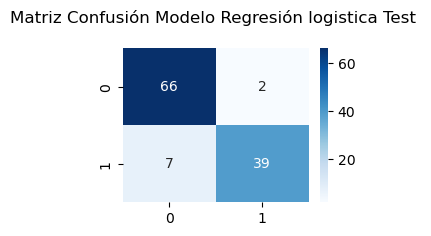

In [37]:
# Dibujar la matriz de confusión modelo Regresion logistica Test
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test, y_pred_rl), annot=True, fmt='d', cmap='Blues', xticklabels=range(2), yticklabels=range(2))
plt.title('Matriz Confusión Modelo Regresión logistica Test \n')
plt.show()

In [38]:
#Se entrena y predice el modelo para train
y_pred_rl_train = mRegL.predict(X_train)
# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_train, y_pred_rl_train))
print("\nClassification Report:")
print(classification_report(y_train, y_pred_rl_train))
#print(confusion_matrix(y_train, y_pred_svm_train))

Accuracy: 0.9625550660792952

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.98      0.97       289
           M       0.96      0.94      0.95       165

    accuracy                           0.96       454
   macro avg       0.96      0.96      0.96       454
weighted avg       0.96      0.96      0.96       454



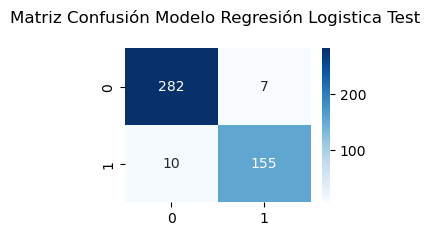

In [39]:
# Dibujar la matriz de confusión modelo Regresion logistica Train
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_train, y_pred_rl_train), annot=True, fmt='d', cmap='Blues', xticklabels=range(2), yticklabels=range(2))
plt.title('Matriz Confusión Modelo Regresión Logistica Test \n')
plt.show()